#### Os dados, até a data do presente estudo, estão no https://opendatasus.saude.gov.br/dataset/bd-srag-2020
#### O presente arquivo é de 01 de fevereiro. Atenção: a última barra no gráfico por semana é menor, pois a semana é incompleta! Note também que o crescimento é diferente por cidades.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\INFLUD-01-02-2021.csv'
df = pd.read_csv(filename, delimiter=';', 
                 usecols='CS_RACA CS_ESCOL_N SEM_NOT DT_NOTIFIC SG_UF_NOT HISTO_VGM PAIS_VGM CARDIOPATI DIABETES OBESIDADE NU_IDADE_N ID_MUNICIP'.split(),
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

c:\users\fmasa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (115) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(1170122, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170122 entries, 0 to 1170121
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   DT_NOTIFIC  1170122 non-null  object 
 1   SEM_NOT     1170122 non-null  int64  
 2   SG_UF_NOT   1170122 non-null  object 
 3   ID_MUNICIP  1170122 non-null  object 
 4   NU_IDADE_N  1170122 non-null  int64  
 5   CS_RACA     1114552 non-null  float64
 6   CS_ESCOL_N  815241 non-null   float64
 7   CARDIOPATI  604660 non-null   float64
 8   DIABETES    564905 non-null   float64
 9   OBESIDADE   484118 non-null   float64
 10  HISTO_VGM   1170122 non-null  int64  
 11  PAIS_VGM    1328 non-null     object 
dtypes: float64(5), int64(3), object(4)
memory usage: 89.3+ MB


In [5]:
for par in enumerate(df.columns): print (par)

(0, 'DT_NOTIFIC')
(1, 'SEM_NOT')
(2, 'SG_UF_NOT')
(3, 'ID_MUNICIP')
(4, 'NU_IDADE_N')
(5, 'CS_RACA')
(6, 'CS_ESCOL_N')
(7, 'CARDIOPATI')
(8, 'DIABETES')
(9, 'OBESIDADE')
(10, 'HISTO_VGM')
(11, 'PAIS_VGM')


In [6]:
# Tabelas de microdados usam números, faço a correspondência desses números com seus significados
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

In [7]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)

In [8]:
df.sample(10)

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_MUNICIP,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CARDIOPATI,DIABETES,OBESIDADE,HISTO_VGM,PAIS_VGM
124854,02/06/2020,23,SP,GUARULHOS,91,Branca,Fund2,2.0,2.0,2.0,2,NaN
472493,04/06/2020,23,RJ,RIO DE JANEIRO,87,Ignorado,Ignorado,NaN,NaN,NaN,0,NaN
1013001,23/06/2020,26,PR,CURITIBA,27,Branca,Superior,NaN,NaN,NaN,2,NaN
203346,05/08/2020,32,DF,BRASILIA,34,Parda,Ignorado,2.0,2.0,2.0,2,NaN
1164121,21/08/2020,34,SE,NOSSA SENHORA DO SOCORRO,57,Branca,Ignorado,NaN,NaN,NaN,2,NaN
824876,14/07/2020,29,RS,PORTO ALEGRE,75,Branca,Fund2,1.0,2.0,2.0,9,NaN
952619,03/01/2021,1,SP,SAO BERNARDO DO CAMPO,56,Branca,Fund1,NaN,NaN,NaN,2,NaN
738266,22/10/2020,43,RS,PORTO ALEGRE,91,Branca,Ignorado,1.0,2.0,2.0,2,NaN
501760,16/06/2020,25,PR,JACAREZINHO,75,Branca,Médio,2.0,1.0,2.0,2,NaN
903092,11/07/2020,28,SP,CATANDUVA,59,Branca,Médio,1.0,1.0,2.0,2,NaN


<AxesSubplot:ylabel='SG_UF_NOT'>

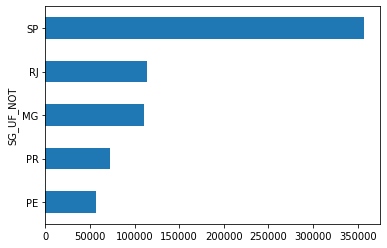

In [9]:
df.groupby('SG_UF_NOT').size().sort_values().tail(5).plot(kind='barh')

<AxesSubplot:ylabel='CS_RACA'>

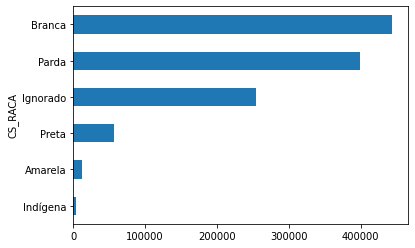

In [10]:
df.groupby('CS_RACA').size().sort_values().plot(kind='barh')

In [11]:
df.groupby('CS_RACA').size().sort_values()

CS_RACA
Indígena      3122
Amarela      12247
Preta        56654
Ignorado    254721
Parda       399445
Branca      443933
dtype: int64

In [12]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         735817
Médio            117559
Fund1            116796
Fund2             73079
Superior          55853
Sem               36657
Não se aplica     34361
dtype: int64

In [13]:
df.query('HISTO_VGM == 1')['HISTO_VGM'].value_counts()

1    1257
Name: HISTO_VGM, dtype: int64

<AxesSubplot:xlabel='PAIS_VGM'>

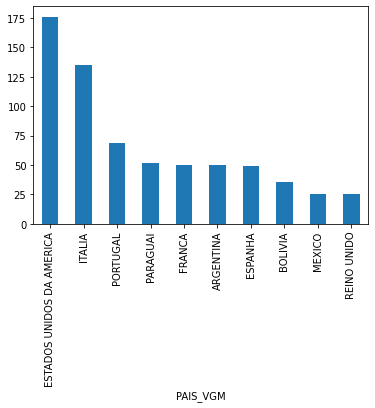

In [14]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='bar')


In [15]:
df.query('CARDIOPATI == 1')['CARDIOPATI'].value_counts()

1.0    370991
Name: CARDIOPATI, dtype: int64

In [16]:
df.query('DIABETES == 1')['DIABETES'].value_counts()

1.0    261232
Name: DIABETES, dtype: int64

In [17]:
df.query('OBESIDADE == 1')['OBESIDADE'].value_counts()

1.0    55198
Name: OBESIDADE, dtype: int64

In [18]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count()

596938

<AxesSubplot:xlabel='SEM_NOT'>

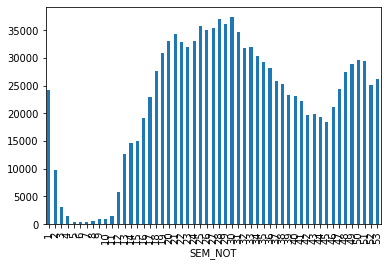

In [19]:
df.groupby('SEM_NOT').size().plot(kind='bar')

<AxesSubplot:xlabel='SEM_NOT'>

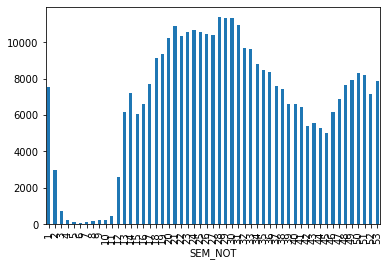

In [23]:
df.query('SG_UF_NOT == "SP"').groupby('SEM_NOT').size().plot(kind='bar')

<AxesSubplot:xlabel='SEM_NOT'>

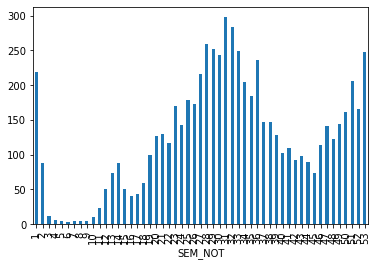

In [24]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"').groupby('SEM_NOT').size().plot(kind='bar')

<AxesSubplot:xlabel='SEM_NOT'>

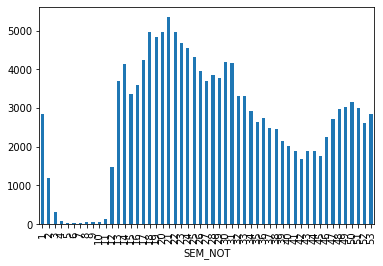

In [26]:
df.query('ID_MUNICIP == "SAO PAULO"').groupby('SEM_NOT').size().plot(kind='bar')